# A2. COMMUNITY STRUCTURE OF COMPLEX NETWORKS

**Group A**: Lloyd Linton Jones, Ihona Maria Correa de Cabo


Network available at:
https://networks.skewed.de/net/budapest_connectome#all_200k


## LOAD THE NETWORK

In [49]:
using_colab = False 
if using_colab:
    from google.colab import drive
    drive.mount('/content/drive/')

In [50]:
# Load the necessary libraries

import networkx as nx
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter

In [51]:
def load_data(file_path="", local=False):
  if local and file_path=="":
    file_path = './network/edges.csv'

  data = pd.read_csv(file_path, delimiter=',')
  return data

In [52]:
Ihona_file_path = '/content/drive/My Drive/MASTER/Segundo año/Complex networks/A2/network/edges.csv'
Lloyd_file_path = ''
Local_file_path = './network/edges.csv'

In [53]:
data = load_data(file_path="", local=True)
data.head()

# source   target   fiber_count_mean   fiber_length_mean  \
0         0        0           2.000000           11.150001   
1         0        1           2.848739           11.204547   
2         0        2           8.256410           14.063546   
3         0        3          10.648045           18.550579   
4         0        4           2.714286           20.963808   

    fractional_anisotropy_mean   electrical_connectivity_median  \
0                     0.340890                         0.143315   
1                     0.267437                         0.175438   
2                     0.290858                         0.352229   
3                     0.304938                         0.334699   
4                     0.269208                         0.102041   

    fiber_count_median   fiber_length_median   fractional_anisotropy_median  \
0                  1.5             10.750006                       0.369788   
1                  2.0             10.799995                       0.260461   
2                  5.0             13.535717                       0.289769   
3                  6.0             18.100000                       0.303307   
4                  2.0             19.599995                       0.246453   

    occurences  
0            4  
1          119  
2          234  
3          179  
4            7

In [54]:
print(data.columns)


Index(['# source', ' target', ' fiber_count_mean', ' fiber_length_mean',
       ' fractional_anisotropy_mean', ' electrical_connectivity_median',
       ' fiber_count_median', ' fiber_length_median',
       ' fractional_anisotropy_median', ' occurences'],
      dtype='object')


In [55]:
columns = [name.replace("#", "").strip() for name in data.columns]
data.columns = columns  

In [56]:
data.columns

Index(['source', 'target', 'fiber_count_mean', 'fiber_length_mean',
       'fractional_anisotropy_mean', 'electrical_connectivity_median',
       'fiber_count_median', 'fiber_length_median',
       'fractional_anisotropy_median', 'occurences'],
      dtype='object')

## DATA EXPLORATION

We plot the histogram of fiber_count_mean and fiber_count_median to decide which one to use as the network weights.

In [57]:
data.shape

(105293, 10)

In [58]:
fc_mean_min, fc_mean_max = np.min(data['fiber_count_mean']), np.max(data['fiber_count_mean'])
fc_median_min, fc_median_max = np.min(data['fiber_count_median']), np.max(data['fiber_count_median'])
print(fc_mean_min, fc_mean_max)
print(fc_median_min, fc_median_max)

1.0 1473.202105
1.0 1545.0


In [59]:
def roundup(x): 
    return int(math.ceil(x / 100.0)) * 100

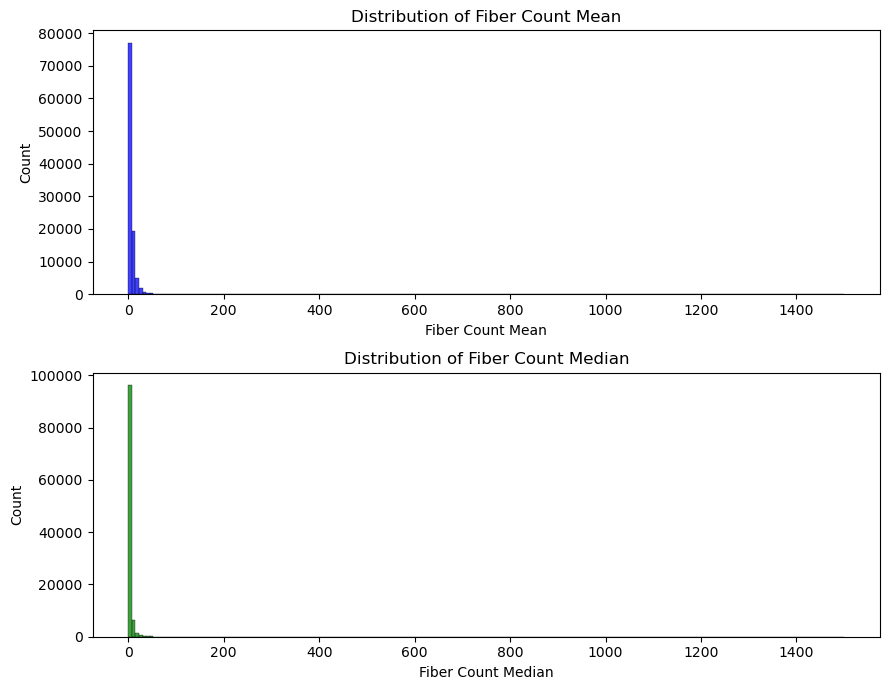

In [60]:
# Plotting the histograms
fig, ax = plt.subplots(2, 1, figsize=(9, 7))

# Fiber count mean
sns.histplot(data=data, x="fiber_count_mean", stat="count", ax=ax[0], color="blue", binrange=[0, roundup(fc_mean_max)], bins=200)
ax[0].set_title('Distribution of Fiber Count Mean')
ax[0].set_xlabel('Fiber Count Mean')
ax[0].set_ylabel('Count')

# Fiber count median
sns.histplot(data=data, x="fiber_count_median", stat="count", ax=ax[1], color="green", binrange=[0, roundup(fc_mean_max)], bins=200)
ax[1].set_title('Distribution of Fiber Count Median')
ax[1].set_xlabel('Fiber Count Median')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

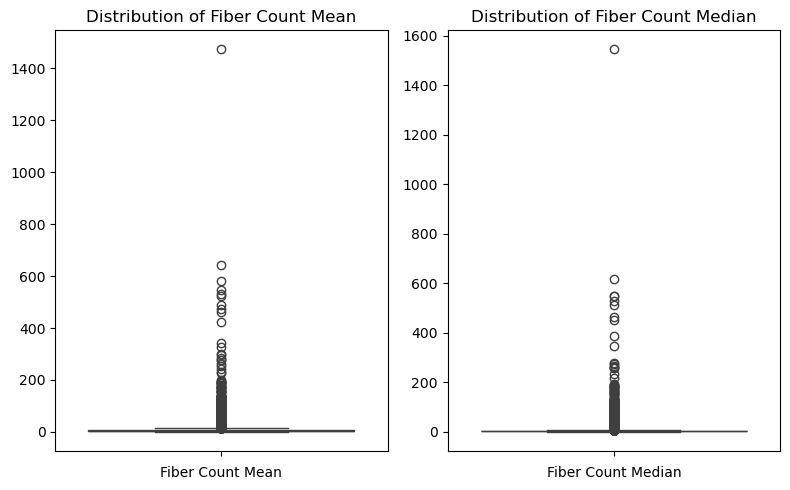

In [61]:
# Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Fiber count mean
sns.boxplot(data=data, y="fiber_count_mean", ax=ax[0])
ax[0].set_title('Distribution of Fiber Count Mean')
ax[0].set_xlabel('Fiber Count Mean')
ax[0].set_ylabel('')

# Fiber count median
sns.boxplot(data=data, y="fiber_count_median", ax=ax[1])
ax[1].set_title('Distribution of Fiber Count Median')
ax[1].set_xlabel('Fiber Count Median')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Both are the same, we will use fiber_count_mean as the weight.

## NETWORK CHARACTERISTICS

We will calculate basic characteristics of the network.

In [62]:
# Create an undirected graph from the edge list
G = nx.from_pandas_edgelist(data, source='source', target='target', edge_attr='fiber_count_mean', create_using=nx.Graph())

In [63]:
# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {G.number_of_nodes()}")

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 1015
Number of edges: 105293


In [64]:
# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average degree: {avg_degree}")

Average degree: 207.47389162561575


In [65]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering}")

Average clustering coefficient: 0.711447560311217


In [17]:
# Assortativity (degree correlation)
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity coefficient: {assortativity}")

Assortativity coefficient: 0.013512716018588219


In [18]:
# Radius of the graph (minimum eccentricity)
try:
    radius = nx.radius(G)
    print(f"Radius: {radius}")
except nx.NetworkXError as e:
    print(f"Error computing radius: {e}")

Radius: 2


In [19]:
diameter = nx.diameter(G) # Diameter
print(f"Diameter: {diameter}")

Diameter: 4


In [20]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:\t', statistics.mean(betweenness_sequence))
print('Median betweenness:\t', statistics.median(betweenness_sequence))

Mean betweenness:	 0.0009433298369436269
Median betweenness:	 0.00023305207331014645


In [21]:
closeness = nx.centrality.closeness_centrality(G)
closeness_sequence = list(closeness.values())

print('Mean closeness:\t', statistics.mean(closeness_sequence))
print('Median closeness:\t', statistics.median(closeness_sequence))

Mean closeness:	 0.5170711574115057
Median closeness:	 0.5123799898938858


In [22]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)
eigenvector_centrality = list(eigenvector_centrality.values())

print('Mean eigenvector centrality:\t', statistics.mean(eigenvector_centrality))
print('Median eigenvector centrality:\t', statistics.median(eigenvector_centrality))

Mean eigenvector centrality:	 0.028217133118431176
Median eigenvector centrality:	 0.02717037690372991


In [23]:
page_rank = nx.pagerank(G)
page_rank_sequence = list(page_rank.values())

print('Mean page rank:', statistics.mean(page_rank_sequence))
print('Median page rank:', statistics.median(page_rank_sequence))

Mean page rank: 0.0009852216748768476
Median page rank: 0.0009422547431002453


## VISUALIZATION

Let's visualize the network to see if there are already any potential groups or communities visible.

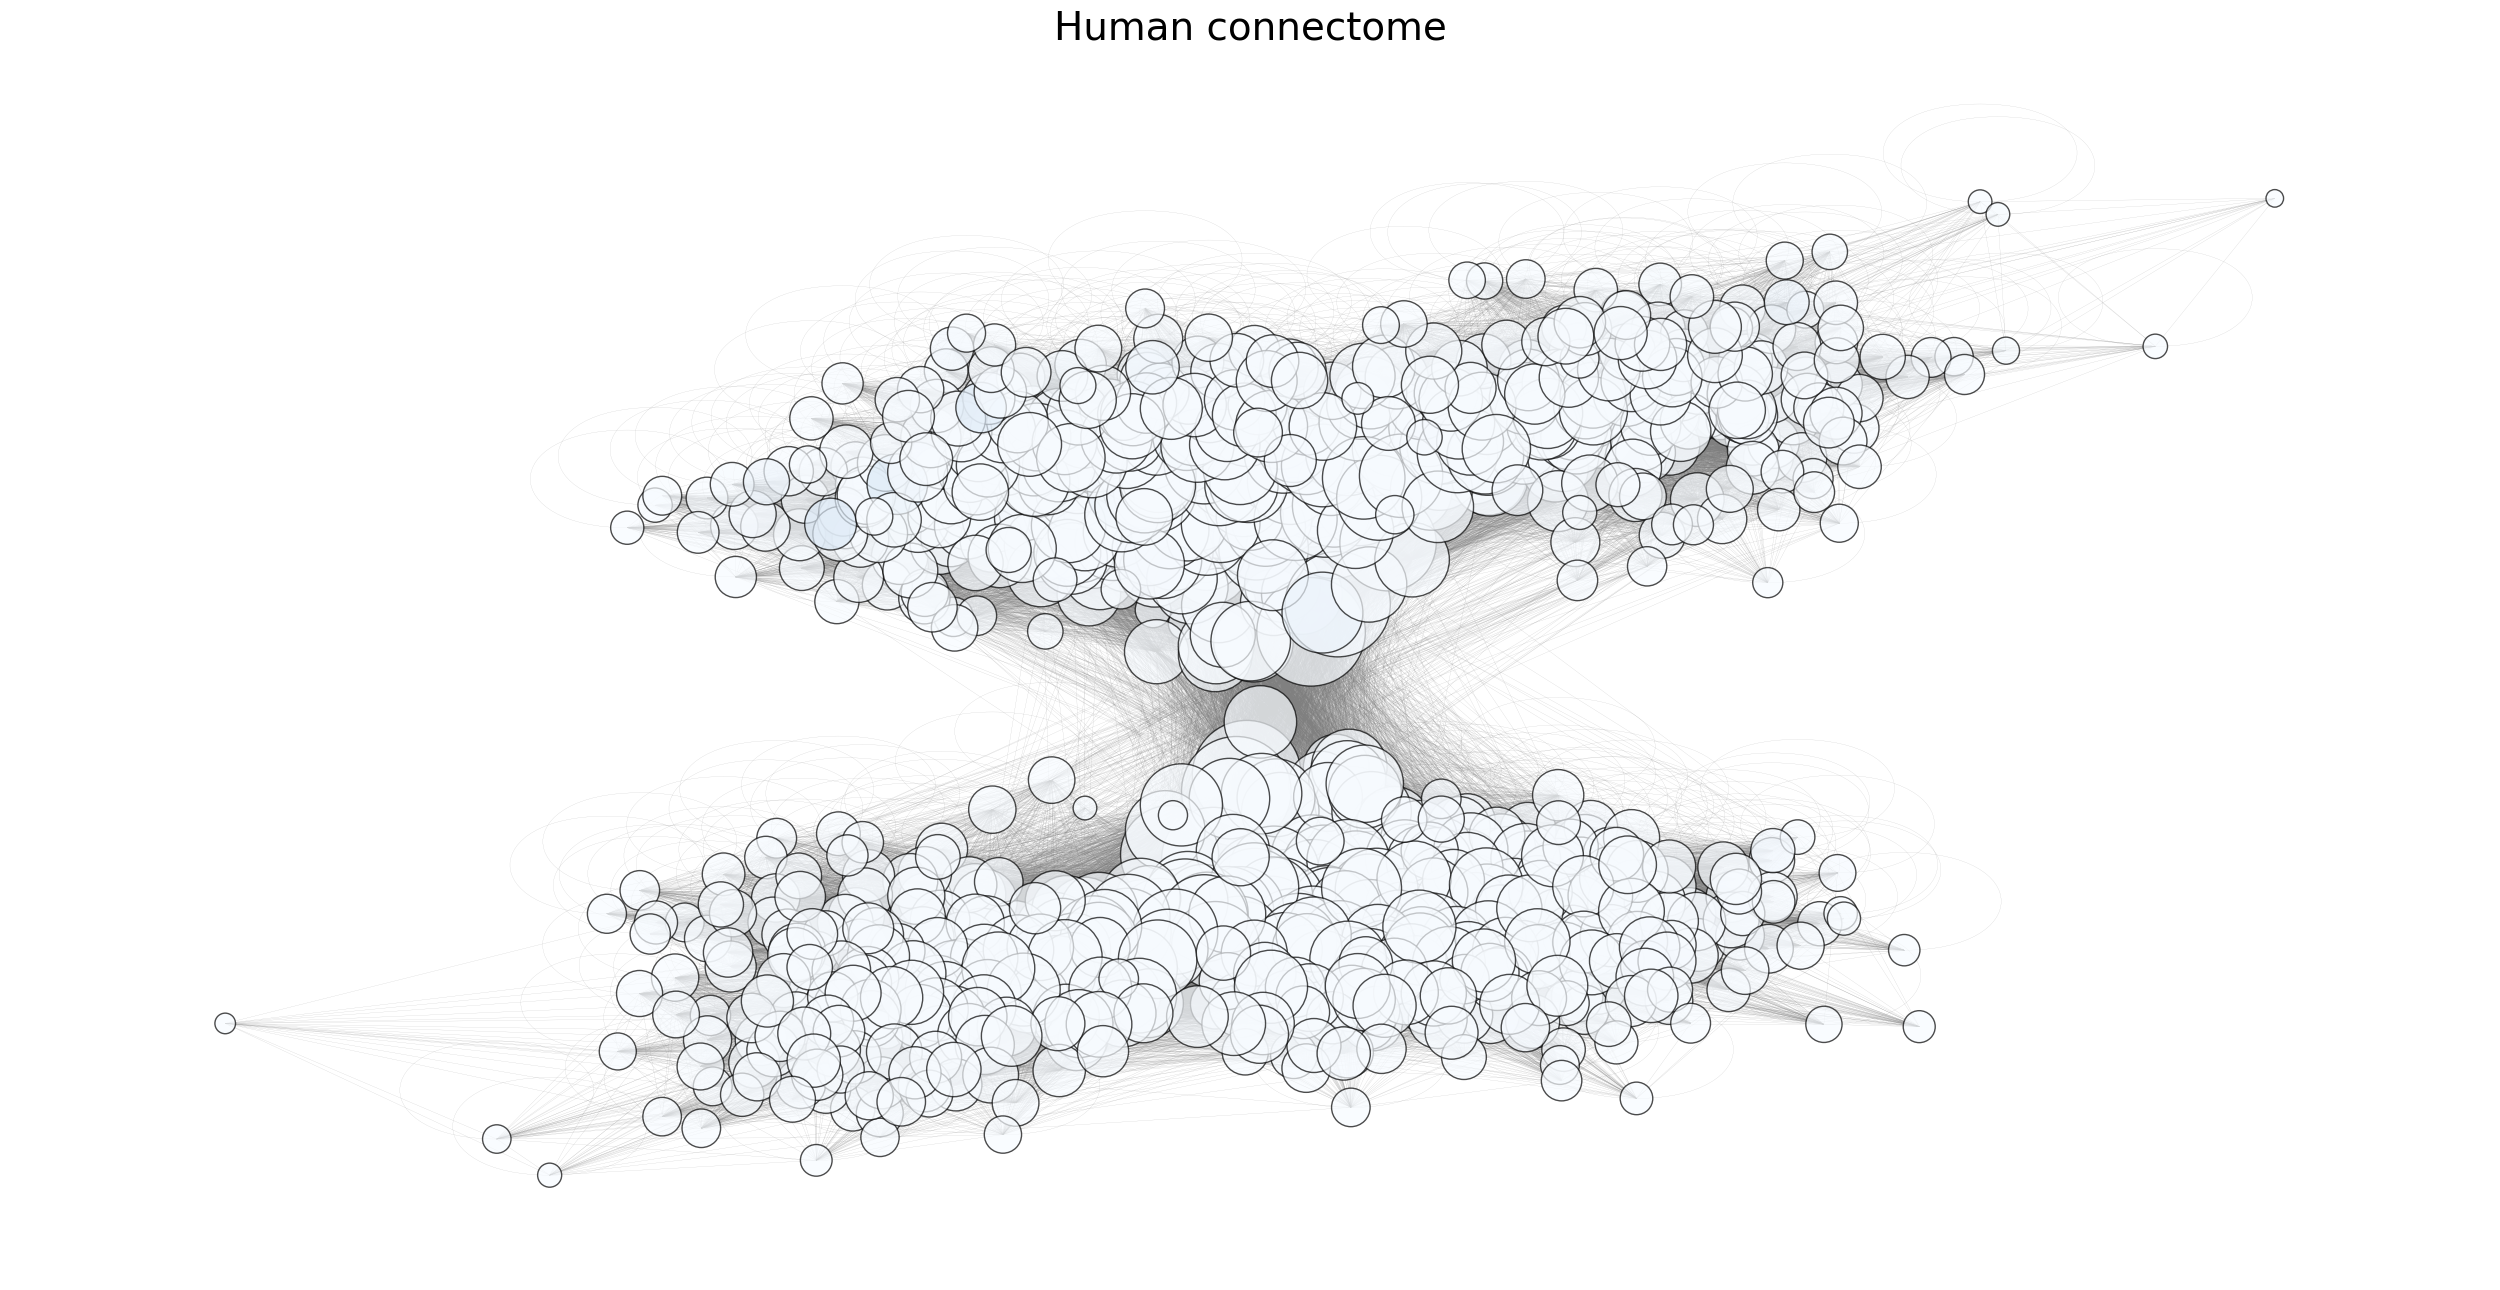

In [24]:
# Set positions
positions = nx.spring_layout(G, k=0.15, iterations=20)

# Set the size of the nodes
nodes_sizes=[10*G.degree(node) for node in G.nodes()]

# Set the color of the nodes based on betweenness
nodes_color=[betweenness_sequence[node] for node in G.nodes()]

# Generate the plot
fig, ax = plt.subplots(1, 1, figsize=(32, 16))
nx.draw_networkx(G, pos=positions, node_size=nodes_sizes, node_color=nodes_color,
                width=0.1, alpha=0.7, edge_color='gray', edgecolors="black",
                with_labels=False, cmap='Blues', vmin=0, vmax=0.4, ax=ax)
ax.axis('off')
ax.set_title("Human connectome", fontsize=28)
plt.show()

We can see that there are two differenciable communities, probably representing the brain hemispheres.

## COMMUNITY DETECTION

### Greedy Algorithm

In [25]:
communities_greedy = nx.community.greedy_modularity_communities(G, weight='fiber_count_mean') ### returns a list with the composition of each community
modularity_greedy = nx.community.modularity(G, communities_greedy) ##compute modularity
print('The modularity of the inferred partition with the greedy algorithm is', modularity_greedy) ## modularity value

The modularity of the inferred partition with the greedy algorithm is 0.45851998849211684


### Louvian algorithm

In [26]:
communities_louvain = nx.community.louvain_communities(G, weight='fiber_count_mean')
modularity_louvain = nx.community.modularity(G, communities_louvain) ##compute modularity
print('The modularity of the inferred partition with the Louvain algorithm is', modularity_louvain) ## modularity value

The modularity of the inferred partition with the Louvain algorithm is 0.49477738339736715


## ANALYSIS OF DETECTED COMMUNITIES

### Loading Metadata 

For this network, we have metadata that indicates the group or community each sample belongs to. Let's upload it in order to compare it with the algorithm's results.

In [27]:
Ihona_metadata_path = '/content/drive/My Drive/MASTER/Segundo año/Complex networks/A2/network/nodes.csv'
Lloyd_metadata_path = ''
Local_metadata_path = './network/nodes.csv'

In [28]:
metadata = load_data(file_path=Local_metadata_path, local=True)
metadata.head()

# index                dn_fsname  dn_hemisphere  \
0        0   lateralorbitofrontal_9          right   
1        1  lateralorbitofrontal_11          right   
2        2   lateralorbitofrontal_5          right   
3        3   lateralorbitofrontal_6          right   
4        4   lateralorbitofrontal_7          right   

                      dn_name  dn_region                               _pos  
0   rh.lateralorbitofrontal_9   cortical  array([-2.59350089, 23.9740305 ])  
1  rh.lateralorbitofrontal_11   cortical  array([-2.56150547, 23.98547655])  
2   rh.lateralorbitofrontal_5   cortical  array([-2.6055234 , 23.98540296])  
3   rh.lateralorbitofrontal_6   cortical  array([-2.61652831, 23.99265041])  
4   rh.lateralorbitofrontal_7   cortical  array([-2.56592723, 23.97017763])

In [29]:
columns = [name.replace("#", "").strip() for name in metadata.columns]
metadata.columns = columns  
metadata.columns

Index(['index', 'dn_fsname', 'dn_hemisphere', 'dn_name', 'dn_region', '_pos'], dtype='object')

In [30]:
metadata['dn_region'].value_counts()

dn_region
cortical       1000
subcortical      15
Name: count, dtype: int64

In [31]:
metadata['dn_hemisphere'].value_counts()

dn_hemisphere
right    508
left     507
Name: count, dtype: int64

We wil use dn_hemisphere as the reference label for our network since it seems more consistent with the communities obtained.

### Greedy Algorithm

In [32]:
community_node={}
count_community=0
for community in communities_greedy:
    for node in community:
        community_node[node]=count_community
    count_community=count_community+1

list_nodes = list(community_node.keys())
list_communities = list(community_node.values())
df_community_greedy = pd.DataFrame(zip(list_nodes, list_communities), columns=['index','community'])
df_community_greedy.head()

index  community
0      0          0
1      1          0
2      2          0
3      3          0
4      4          0

In [33]:
df_community_greedy['community'].value_counts() # There are only two communities, 0 and 1

community
0    513
1    502
Name: count, dtype: int64

In [34]:
# Form the new dataset with the index (nodes) and the community they are in (class)
metadata = metadata[['index', 'dn_hemisphere']]
# Merge metadata with detected communities data
df_community_greedy['index']=df_community_greedy['index'].astype(int) #We ensure the proper type
merge_df_greedy = pd.merge(df_community_greedy, metadata, on='index').sort_values('index') ## Merge community and metadata
merge_df_greedy

index  community dn_hemisphere
0         0          0         right
1         1          0         right
2         2          0         right
3         3          0         right
4         4          0         right
...     ...        ...           ...
510    1010          0          left
1013   1011          1          left
511    1012          0          left
1014   1013          1          left
512    1014          0          left

[1015 rows x 3 columns]

In [35]:
statistics_greedy = merge_df_greedy.groupby(['community','dn_hemisphere'])['index'].count().reset_index() ## We count the nodes sharing dn_hemisphere and community
statistics_greedy

community dn_hemisphere  index
0          0          left      5
1          0         right    508
2          1          left    502

There are 5 misclassified nodes that were assigned to the right class but belong to the left one.

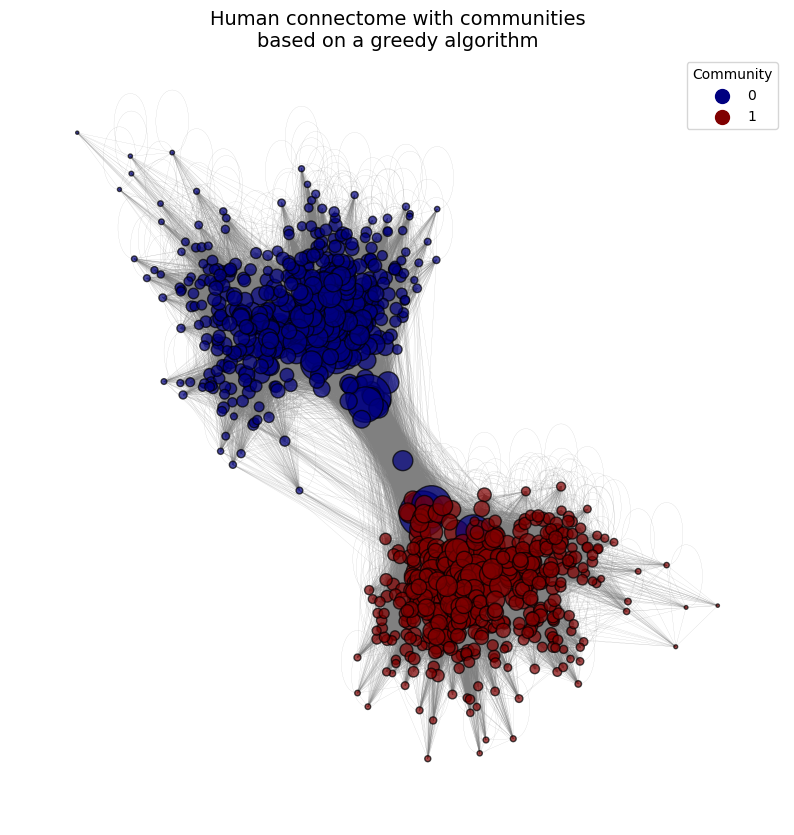

In [36]:
nodelist = list(G.nodes())
node_positions = nx.spring_layout(G, weight='fiber_count_mean')
fig, ax = plt.subplots(1, 1, figsize=(10,10))


list_classes = statistics_greedy['dn_hemisphere'].unique()
list_classes.sort()
list_communities = statistics_greedy['community'].unique()
list_communities.sort()

number_classes = len(list_classes)
number_communities = len(list_communities)
colors=plt.cm.jet(np.linspace(0, 1, number_communities))

color_class = {}
label_class = {}
count_class = 0
for class_ in list_communities:
    color_class[class_] = colors[count_class]
    label_class[class_]=0
    count_class=count_class+1

nodes_color = []
for node in nodelist:
    nodes_color.append(colors[community_node[node]])

nodes_sizes = []
for node in nodelist:
    nodes_sizes.append(.1*G.degree(node, weight='fiber_count_mean'))

nx.draw(G, node_size=nodes_sizes, node_color=nodes_color, pos=node_positions,
        width=0.1, alpha=0.7, edge_color='gray', edgecolors='black',
        with_labels=False, ax=ax)

# Add a legend
for class_, color in color_class.items():
    ax.scatter([], [], c=[color], label=class_, s=100)  # 0 for right, 1 for left

ax.legend(title="Community", loc="best")
ax.set_title("Human connectome with communities\nbased on a greedy algorithm", fontsize=14)
plt.show()

### Louvian algorithm



In [37]:
community_node = {} ## We assign the community to each node
count_community = 0 ## A simple way to label community from 0 to ncommunities-1
for community in communities_louvain: ### For each community in the list of communities
    for node in community: ## Assign the same label to all the nodes in that community
        community_node[node] = count_community
    count_community = count_community+1 ## Change label when moving to the next community

list_nodes = list(community_node.keys()) ## list of nodes
list_communities = list(community_node.values()) ## their associated communities
df_community_louvain = pd.DataFrame(zip(list_nodes,list_communities), columns=['index','community']) ##create dataframe for convenience
df_community_louvain.head()

index  community
0      0          0
1      1          0
2      2          0
3      3          0
4      4          0

In [38]:
df_community_louvain['community'].value_counts() # There are only two communities, 0 and 1

community
3    312
0    309
2    199
1    195
Name: count, dtype: int64

In [39]:
df_community_louvain['index'] = df_community_louvain['index'].astype(int) #We ensure the proper type
merge_df_louvain = pd.merge(df_community_louvain, metadata, on='index').sort_values('index') ## Merge community and metadata
statistics_louvain = merge_df_louvain.groupby(['community','dn_hemisphere'])['index'].count().reset_index() ##We count the nodes sharing class and community
statistics_louvain

community dn_hemisphere  index
0          0         right    309
1          1          left    195
2          2         right    199
3          3          left    312

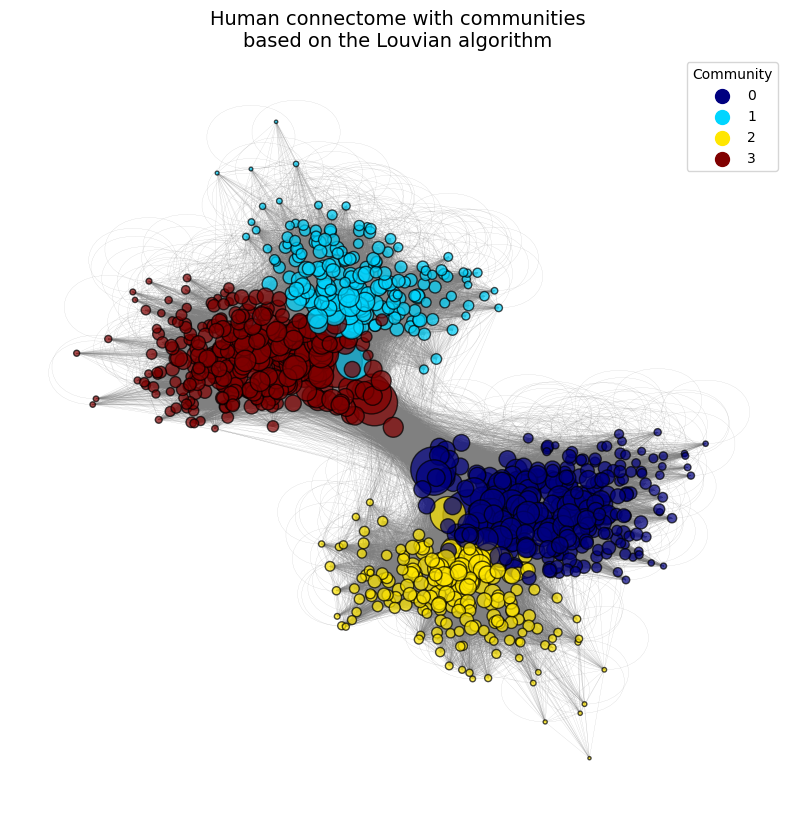

In [40]:
nodelist=list(G.nodes())
node_positions=nx.spring_layout(G, weight='fiber_Count_Mean')
fig,ax=plt.subplots(1,1,figsize=(10,10))

list_classes = statistics_louvain['dn_hemisphere'].unique()
list_classes.sort()
list_communities = statistics_louvain['community'].unique()
list_communities.sort()

number_classes = len(list_classes)
number_communities = len(list_communities)
colors=plt.cm.jet(np.linspace(0,1,number_communities))

color_class = {}
label_class = {}
count_class = 0
for class_ in list_communities:
    color_class[class_] = colors[count_class]
    label_class[class_] = 0
    count_class = count_class + 1

nodes_color = []
for node in nodelist:
    nodes_color.append(colors[community_node[node]])

nodes_sizes = []
for node in nodelist:
    nodes_sizes.append(.1*G.degree(node, weight='fiber_count_mean'))

nx.draw(G, node_size=nodes_sizes, node_color=nodes_color, pos=node_positions,
        width=0.1, alpha=0.7, edge_color='gray', edgecolors='black',
        with_labels=False, ax=ax)

# Add a legend
for class_, color in color_class.items():
    ax.scatter([], [], c=[color], label=class_, s=100)

ax.legend(title="Community", loc="best")
ax.set_title("Human connectome with communities\nbased on the Louvian algorithm", fontsize=14)
plt.show()

### Stochastic Block Model (SBM)

In [41]:
def create_block_sizes_matrix_p(number_nodes, number_blocks, p_block, prs):
    nodes_per_block = int(number_nodes/number_blocks)
    block_sizes = []
    matrix_p = []
    
    for i in range(number_blocks):
        block_sizes.append(nodes_per_block)
        row_matrix_p = []
        for j in range(number_blocks):
            if j == i:
                row_matrix_p.append(p_block)
            else:
                row_matrix_p.append(prs)
        matrix_p.append(row_matrix_p)
    
    return block_sizes, matrix_p

#### SBM Parameters

In [42]:
# We'll use 2 blocks since we know there are two hemispheres
number_nodes = G.number_of_nodes()
number_blocks = 2
prr = 0.5  # initial probability of intra-block connection
prs = 0.02  # initial probability of inter-block connection

#### Modularity Optimization

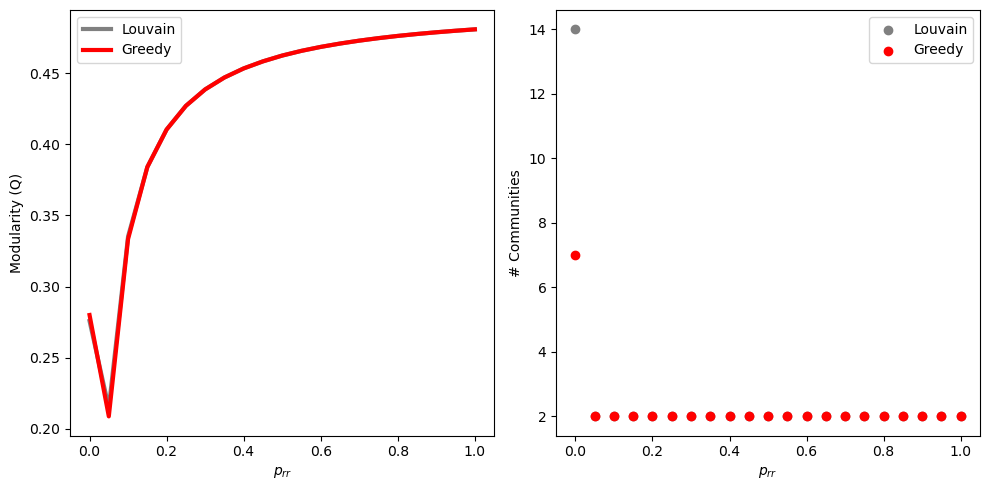

In [43]:
prr_values=np.linspace(0,1,21) # List of value of prr

modularities_louvain=[] # List of modularities of the partitions found by the Louvain algortithm for each prr value
modularities_greedy=[] # List of modularities of the partitions found by the greedy algortithm for each prr value

number_communities_louvain=[] # List containing the number of communities detected by the Louvain algorithm for each prr value
number_communities_greedy=[] # List  containing the number of communities detected by the greedy algorithm for each prr value

for prr in prr_values:
    block_sizes, matrix_p = create_block_sizes_matrix_p(number_nodes, number_blocks, prr, prs) ##block sizes matrix p
    G=nx.stochastic_block_model(block_sizes, matrix_p, seed=2) ## network
    
    communities=nx.community.greedy_modularity_communities(G) ## get communities maximizing modularity!
    modularity=nx.community.modularity(G,communities) ## get modularity
    modularities_greedy.append(modularity)
    number_communities_greedy.append(len(communities))

    communities=nx.community.louvain_communities(G) ## get communities maximizing modularity!
    modularity=nx.community.modularity(G,communities) ## get modularity
    modularities_louvain.append(modularity)
    number_communities_louvain.append(len(communities))

fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].plot(prr_values,modularities_louvain,lw=3,c='grey',label='Louvain')
ax[0].plot(prr_values,modularities_greedy,lw=3,c='red',label='Greedy')

ax[1].scatter(prr_values,number_communities_louvain,c='grey',label='Louvain')
ax[1].scatter(prr_values,number_communities_greedy,c='red',label='Greedy')

ax[0].set_xlabel(r'$p_{rr}$')
ax[1].set_xlabel(r'$p_{rr}$')

ax[0].set_ylabel('Modularity (Q)')
ax[1].set_ylabel('# Communities')

ax[0].legend()
ax[1].legend()

fig.tight_layout()

#### Create and visualize various models

In [44]:
prr_chosen_values = [0.25, 0.5, 0.75, 1.0]  # list of probabilities of intra-block connection
methods = ["greedy", "louvian"]

sbm_parameters = {}

for method in methods:
    sbm_parameters[method] = {}
    for i, prr in enumerate(prr_chosen_values): 
        block_sizes, matrix_p = create_block_sizes_matrix_p(number_nodes, number_blocks, prr, prs)
        G_sbm = nx.stochastic_block_model(block_sizes, matrix_p, seed=42)
        if method == "greedy":
            communities_sbm = nx.community.greedy_modularity_communities(G_sbm)
        elif method == "louvian":
            communities_sbm = nx.community.louvain_communities(G_sbm)
        
        modularity_sbm = nx.community.modularity(G_sbm, communities_sbm)
        sbm_parameters[method][i] = [prr, block_sizes, matrix_p, G_sbm, communities_sbm, modularity_sbm]

In [45]:
def calculate_stats(parameters: dict, verbose=True):
    
    stats = {}

    for method, data in parameters.items():
        
        stats[method] = {}

        for key, value in data.items():
            communities_sbm = value[4]
            community_node = {} ## We assign the community to each node
            count_community = 0 ## A simple way to label community from 0 to ncommunities-1
            for community in communities_sbm: ### For each community in the list of communities
                for node in community: ## Assign the same label to all the nodes in that community
                    community_node[node] = count_community
                count_community = count_community+1 ## Change label when moving to the next community

            list_nodes = list(community_node.keys()) ## list of nodes
            list_communities = list(community_node.values()) ## their associated communities
            df_community_sbm = pd.DataFrame(zip(list_nodes, list_communities), columns=['index','community']) ##create dataframe for convenience

            df_community_sbm['index'] = df_community_sbm['index'].astype(int) # We ensure the proper type
            merge_df_sbm = pd.merge(df_community_sbm, metadata, on='index').sort_values('index') ## Merge community and metadata
            statistics_sbm = merge_df_sbm.groupby(['community','dn_hemisphere'])['index'].count().reset_index() ##We count the nodes sharing class and community
            
            stats[method][key] = [merge_df_sbm, statistics_sbm]
            
            if verbose: 
                print(f"method -> {method}, prr = {value[0]}\n{statistics_sbm}")

    return stats 

In [46]:
def create_visualisation_sbm(parameters: dict, stats: dict):

    ncols = len(parameters[list(parameters.keys())[0]])
    fig,ax=plt.subplots(2, ncols, figsize=(10*ncols, 20))

    for i, (method, data) in enumerate(parameters.items()): 
    
        for key, value in data.items():
            
            prr = value[0]
            G_sbm = value[3]
            modularity = value[5]
            statistics_sbm = stats[method][key][1]

            communities_sbm = value[4]
            community_node = {} ## We assign the community to each node
            count_community = 0 ## A simple way to label community from 0 to ncommunities-1
            for community in communities_sbm: ### For each community in the list of communities
                for node in community: ## Assign the same label to all the nodes in that community
                    community_node[node] = count_community
                count_community = count_community+1 ## Change label when moving to the next community

            # Visualize 
            nodelist=list(G_sbm.nodes())
            node_positions=nx.spring_layout(G_sbm, weight='fiber_Count_Mean')

            list_classes = statistics_sbm['dn_hemisphere'].unique()
            list_classes.sort()
            list_communities = statistics_sbm['community'].unique()
            list_communities.sort()

            number_classes = len(list_classes)
            number_communities = len(list_communities)
            colors=plt.cm.jet(np.linspace(0, 1, number_communities))

            color_class = {}
            label_class = {}
            count_class = 0
            for class_ in list_communities:
                color_class[class_] = colors[count_class]
                label_class[class_] = 0
                count_class = count_class + 1

            nodes_color = []
            for node in nodelist:
                nodes_color.append(colors[community_node[node]])

            nodes_sizes = []
            for node in nodelist:
                nodes_sizes.append(.1*G_sbm.degree(node, weight='fiber_count_mean'))

            nx.draw(G_sbm, node_size=nodes_sizes, node_color=nodes_color, pos=node_positions,
                    width=0.1, alpha=0.7, edge_color='gray', edgecolors='black',
                    with_labels=False, ax=ax[i, key])

            # Add a legend
            for class_, color in color_class.items():
                ax[i, key].scatter([], [], c=[color], label=class_, s=100)

            ax[i, key].legend(title="Community", loc="best")
            formula = r'$p^{%s}_{rr}=%.2lf$'%(method, prr)
            modularity = r'$modularity=%9.8f$'%(modularity)
            title = f'{formula}\n{modularity}'
            ax[i, key].set_title(title, fontsize=22)
    
    constant_parameters = r'$p_{rs}=%.2lf$'%(prs)
    constant_parameters = "\nwith: " + constant_parameters + ", " + r'$blocks=%d$'%(number_blocks) + ", " + r'$nodes=%d$'%(number_nodes)
    fig.suptitle(f"Human connectome with communities\nbased on the Stochastic Block Model{constant_parameters}\n", fontsize=26)
    plt.show()
    
    return 0

In [47]:
sbm_stats = calculate_stats(sbm_parameters)

method -> greedy, prr = 0.25
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> greedy, prr = 0.5
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> greedy, prr = 0.75
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> greedy, prr = 1.0
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> louvian, prr = 0.25
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> louvian, prr = 0.5
   community dn_hemisphere  index
0          0         right    507
1          1          left    506
2          1         right      1
method -> l

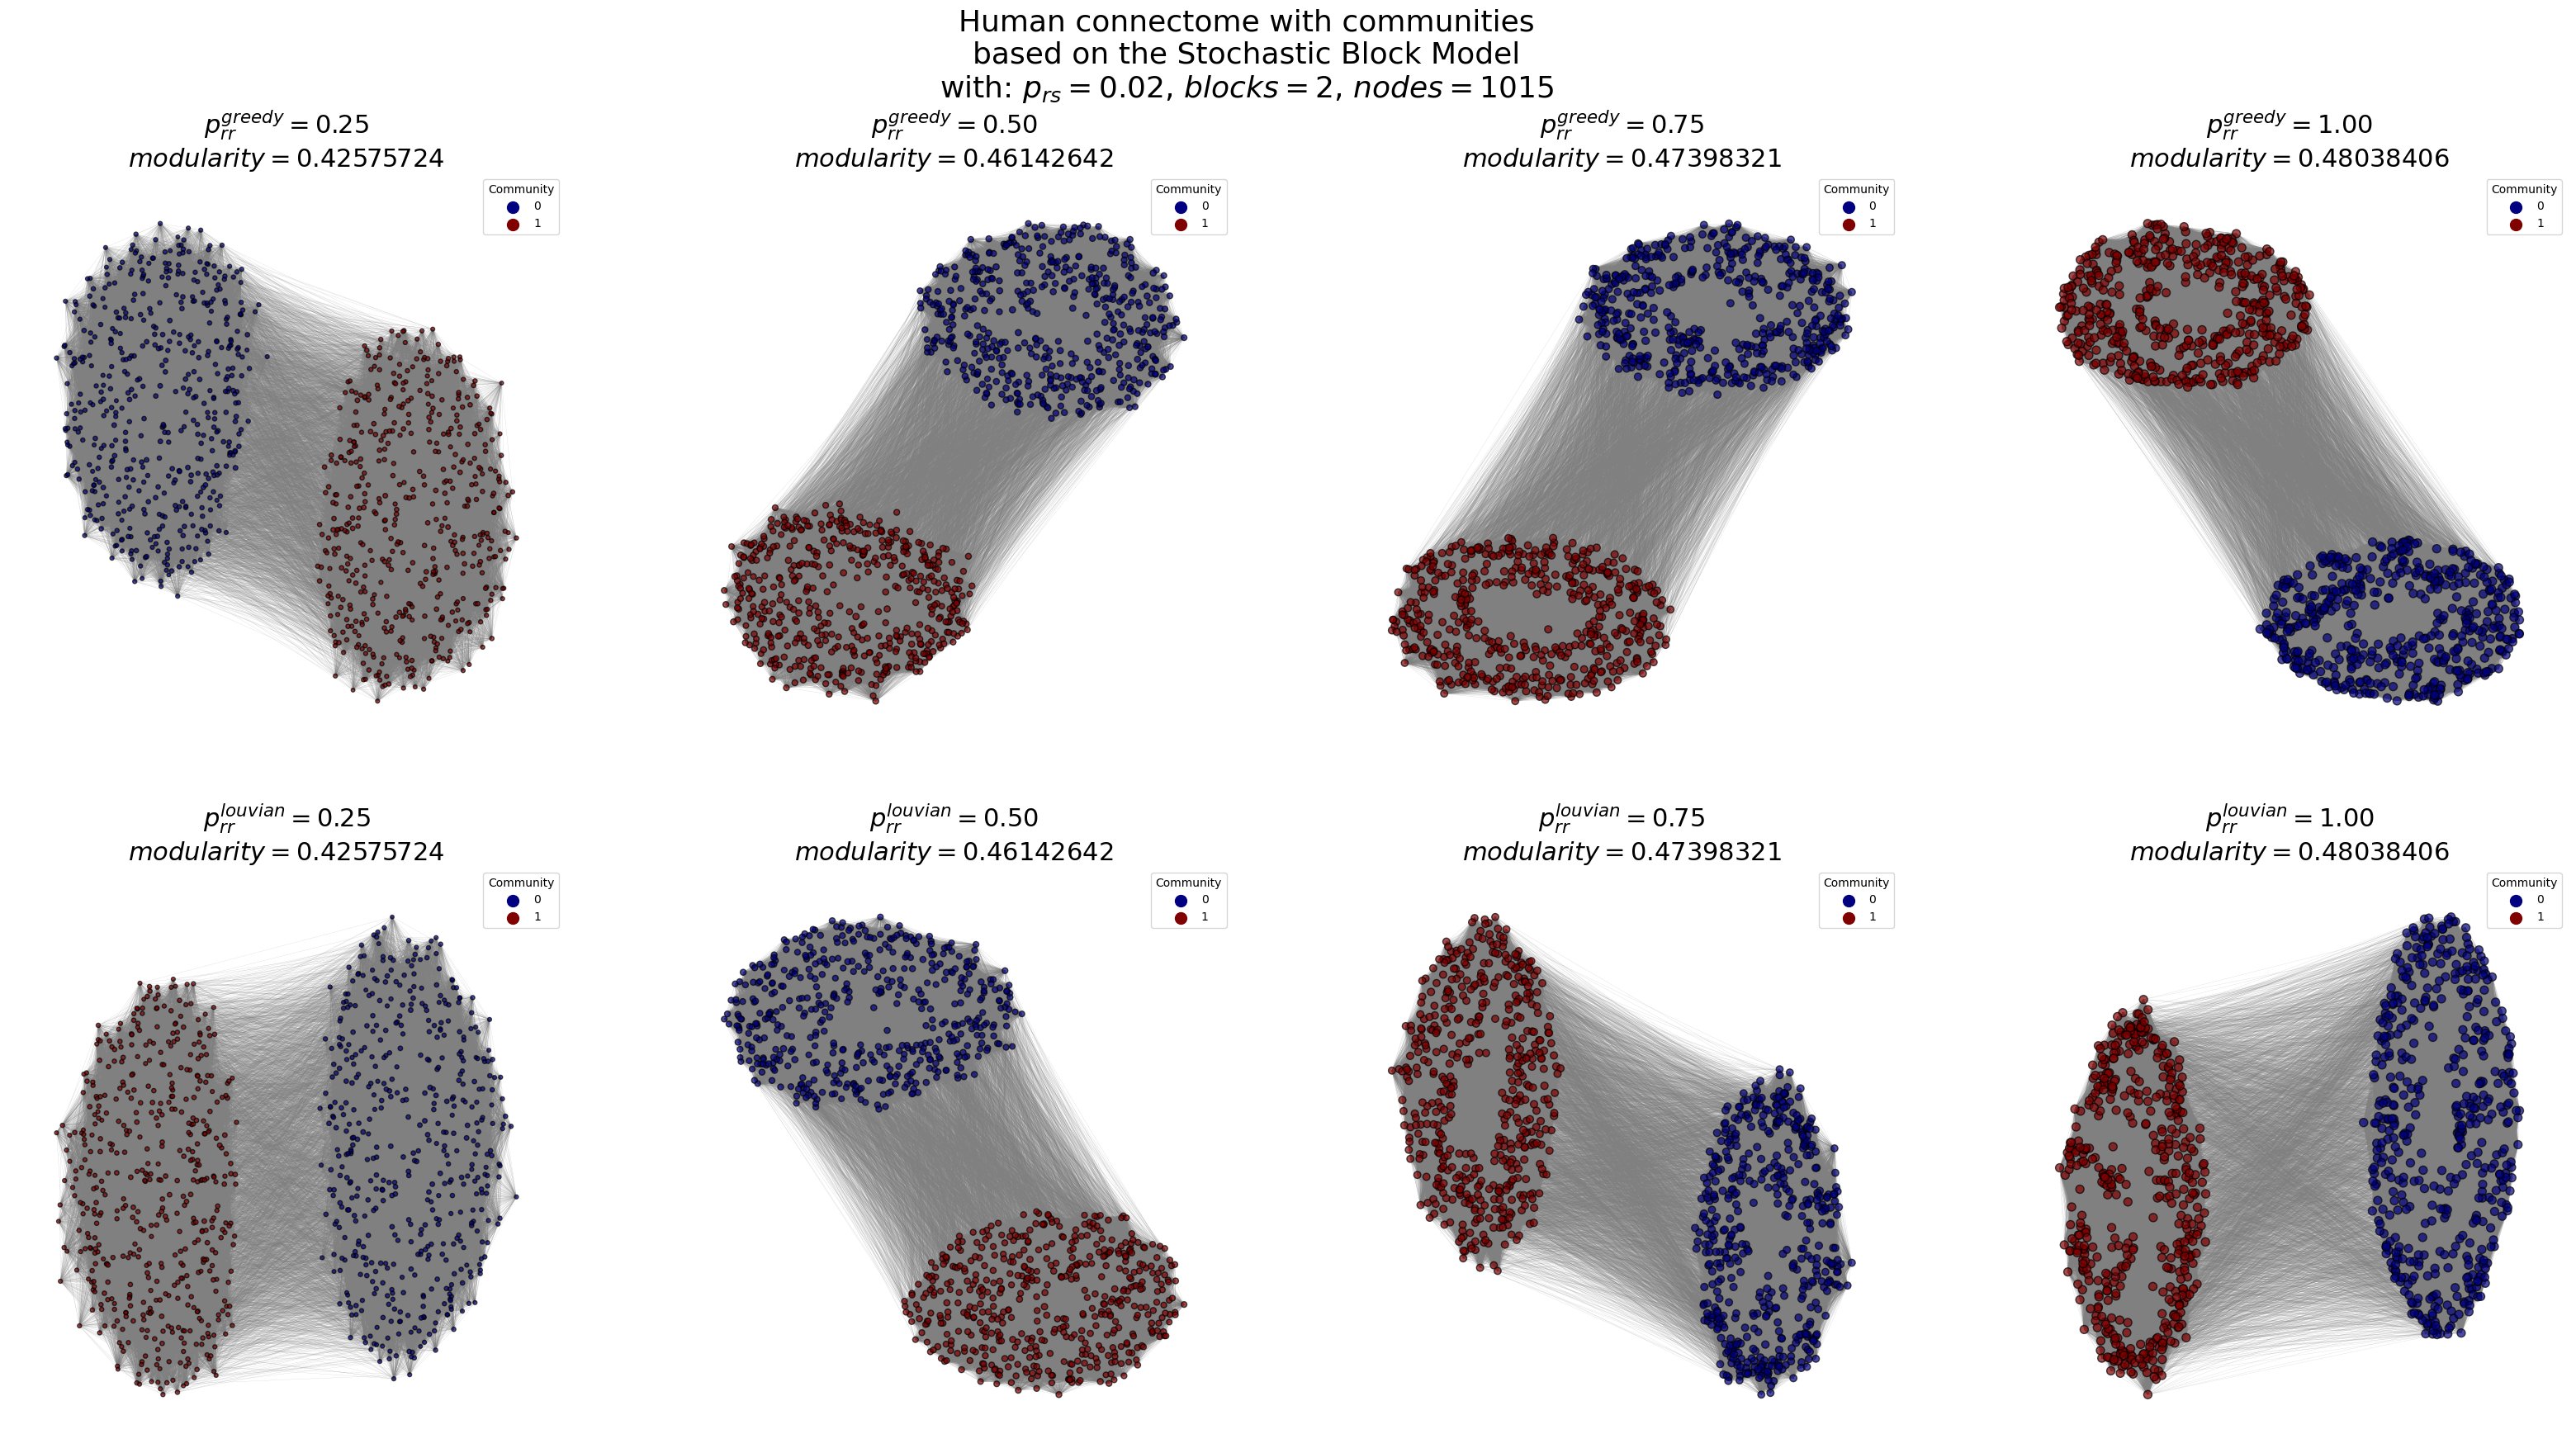

0

In [48]:
create_visualisation_sbm(sbm_parameters, sbm_stats)